In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

accuracy_score is 0.7556221889055472


(-5.0, 5.0)

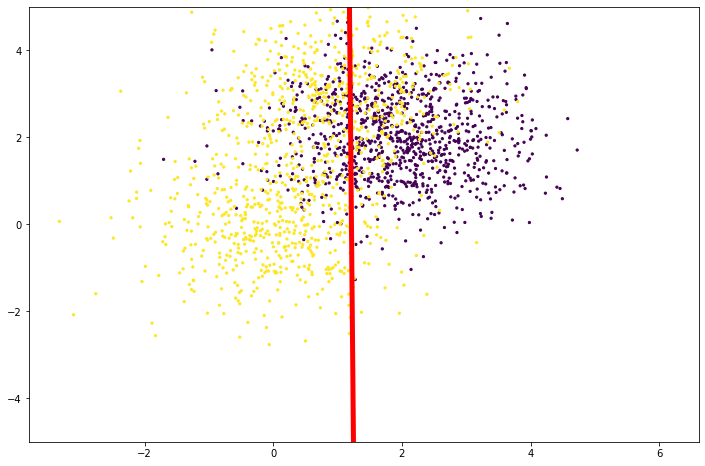

In [77]:
fig = plt.figure(figsize=(12,8))
x = np.r_[np.random.normal(loc=(2,2),size=(1000,2)),np.random.normal(loc=(0,0),size=(500,2)),np.random.normal(loc=(1,3),size=(500,2))]
y = np.r_[np.zeros(1000),np.ones(500),np.ones(500)]
plt.scatter(x[:,0],x[:,1],c=y,s=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3.0)#將data.data和data.target產生資料拆分成訓練及測試二組。
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(f'accuracy_score is {accuracy_score(y_test,y_pred)}')
xmin,xmax =np.min(x[:,0]),np.max([x[:,1]])
xp =np.r_[xmin,xmax]
yp = (-lr.intercept_-lr.coef_[0,0]*xp)/lr.coef_[0,1]
plt.plot(xp,yp,'r',lw=5)
plt.ylim([-5,5])

<ipython-input-78-1de1f8507352>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,yhat)


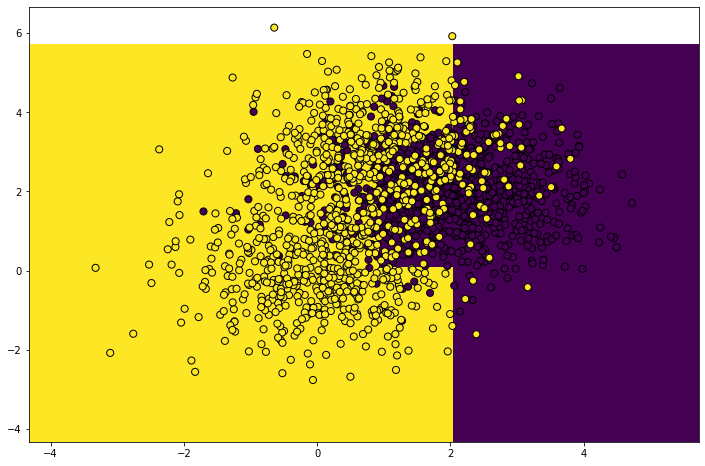

In [78]:
from sklearn.tree import DecisionTreeClassifier#決策樹
tree= DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=17)#criterion=判斷 max_depth=深度 random_state=產生亂數
tree.fit(x,y)#判斷x,y

xmin, xmax = x[:,0].min()-1, x[:,0].max()+1#x的範圍
ymin, ymax = x[:,0].min()-1, x[:,0].max()+1#y的範圍
xx ,yy =np.meshgrid(np.linspace(xmin,xmax,1000), np.linspace(ymin,ymax,1000))#
yhat = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)#
plt.figure(figsize=(12,8))
plt.pcolormesh(xx,yy,yhat)
plt.scatter(x[:,0],x[:,1],c=y ,s=50,edgecolors='k')



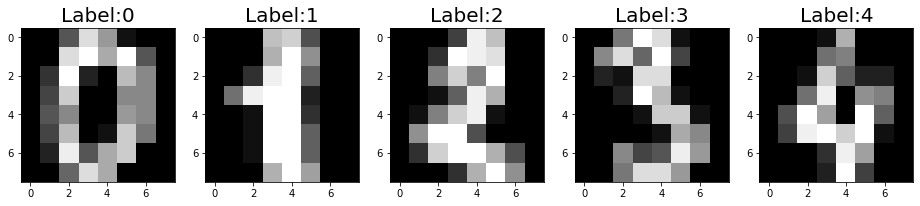

In [60]:
from sklearn.datasets import load_digits
data= load_digits()
x,y=data.data,data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3.0)#將data.data和data.target產生資料拆分成訓練及測試二組。

x, y =np.array(data.data),np.array(data.target)
plt.figure(figsize=(16,4))
for i, image in enumerate(x[:5,:]):
    plt.subplot(1,5,i+1)#
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title(f'Label:{y[i]}', fontsize=20)

In [55]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(f'accuracy-score of Training set : {accuracy_score(y_train, lr.predict(x_train))}')
print(f'accuracy-score of Testing set : {accuracy_score(y_test, y_pred)}')


accuracy-score of Training set : 0.5753938484621155
accuracy-score of Testing set : 0.56071964017991


In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)

x,y=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3.0)#將data.data和data.target產生資料拆分成訓練及測試二組。

In [69]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(f'accuracy-score of Training set : {accuracy_score(y_train, lr.predict(x_train))}')
print(f'accuracy-score of Testing set : {accuracy_score(y_test, y_pred)}')


accuracy-score of Training set : 0.96
accuracy-score of Testing set : 0.96


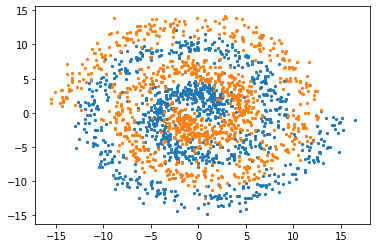

In [275]:
N=1000
angle = np.random.rand(N)*np.pi*4
r1 = angle +np.pi/2
dataA=np.array([r1*np.cos(angle),r1*np.sin(angle)]).T +np.random.randn(N,2)


r2 = -angle -np.pi/2
dataB=np.array([r2*np.cos(angle),r2*np.sin(angle)]).T +np.random.randn(N,2)

plt.scatter(dataA[:,0],dataA[:,1],s=5)
plt.scatter(dataB[:,0],dataB[:,1],s=5)

x = np.r_[dataA,dataB]
y = np.r_[np.zeros(N),np.ones(N)]




In [276]:
lr = LogisticRegression()
lr.fit(x,y)
y_pred = lr.predict(x)
print(f'lr  is : {accuracy_score(y, y_pred)}')

lr  is : 0.5145


In [277]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x,y)
y_pred = tree.predict(x)
print(f'tree is :{accuracy_score(y,y_pred)}')




tree is :0.614


In [279]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=7)
knn.fit(x,y)
y_pred = knn.predict(x)
print(f'knn  is : {accuracy_score(y, y_pred)}')




knn  is : 0.919


(7500, 2)


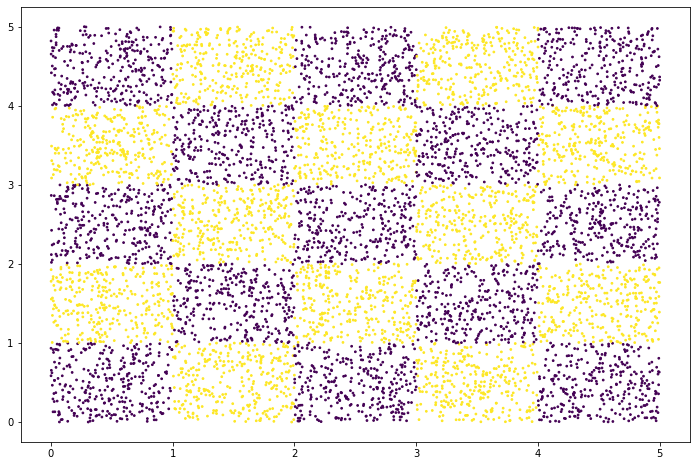

In [269]:
fig = plt.figure(figsize=(12,8))

N=300
x = np.array([np.random.rand(N,2)+np.array([i,j]) for i in range(5)  for j in range(5)])
x = x.reshape(-1,2)

y = np.array([np.zeros(N) if i%2==0 else np.ones(N) for i in range(25)])
y = y.flatten()

print(x.shape)
plt.scatter(x[:,0],x[:,1],c=y,s=3)


In [297]:
lr = LogisticRegression()
lr.fit(x,y)
y_pred = lr.predict(x)
print(f'lr  is : {accuracy_score(y, y_pred)}')





lr  is : 0.52


In [314]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=18)
tree.fit(x,y)
y_pred = tree.predict(x)
print(f'tree is :{accuracy_score(y,y_pred)}')


from sklearn.model_selection import GridSearchCV

tree_params={'max_depth':range(1,32,2)} #用字典方式，設定max_depth的參數，由3次到21次，每次加1。
tree_grid = GridSearchCV(tree, param_grid=tree_params, cv=5 ,n_jobs=-1)
#設定tree_grid模式測試參數，cv:把資料分成5份，4份作訓練、1份作比對，n_jos=-1設定多核CUP運作方式，-1表依機器設定

tree_grid.fit(x,y) #帶入訓練資料
print(f'Best Params is{tree_grid.best_params_}') #印出測試後的到最佳參數
print(f'Best Score is{tree_grid.best_score_}') #印出測試後的到最佳分數

tree is :1.0
Best Params is{'max_depth': 9}
Best Score is0.4778666666666666


In [295]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=7)
knn.fit(x,y)
y_pred = knn.predict(x)
print(f'knn  is : {accuracy_score(y, y_pred)}')


knn  is : 1.0


(7500, 2)


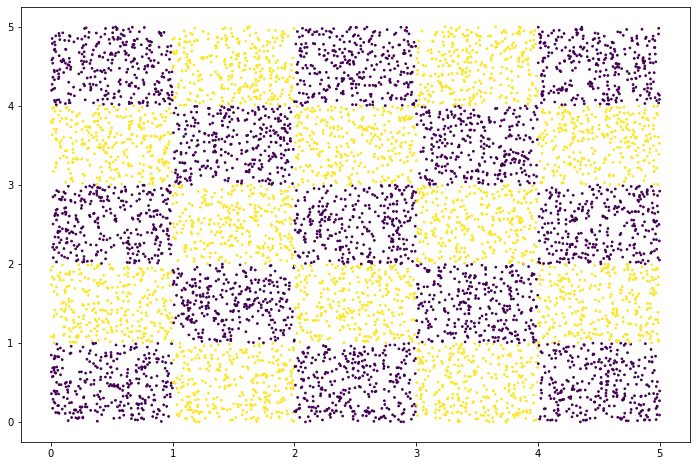

In [302]:
N=300
x = np.array([np.random.rand(N,2)+np.array([i,j]) for i in range(5)  for j in range(5)])
x = x.reshape(-1,2)

y = np.array([np.zeros(N) if i%2==0 else np.ones(N) for i in range(25)])
y = y.flatten()

print(x.shape)
fig = plt.figure(figsize=(12,8))
plt.scatter(x[:,0],x[:,1],c=y,s=3)